In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression

In [139]:
data = make_classification(n_classes=2, n_samples=100, n_features=2, 
                           n_informative=1, n_redundant=0, n_clusters_per_class=1, 
                           hypercube=False, class_sep=20)

In [140]:
df = pd.DataFrame(data[0][:,0:2], columns=['f1','f2'])

In [141]:
df['target'] = data[1]

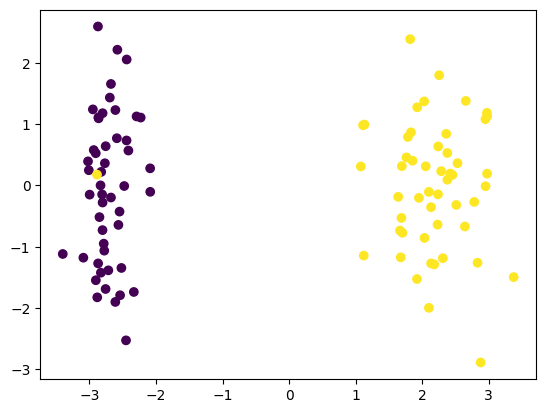

In [142]:
plt.scatter(x=df['f1'], y=df['f2'], c=df['target'])

In [143]:
lr_clf = LogisticRegression(solver='sag')

In [144]:
X = df.drop(columns=['target']).values
y = df['target'].values

In [145]:
def perceptron(X, y, epochs = 1000, lr=0.01):
    X = np.insert(X, 0, 1, axis=1)
    # ax + by + c = 0
    weights = np.ones(X.shape[1])
    for i in range(epochs):
        index = np.random.randint(0, X.shape[0])
        y_hat = sigmoid(np.dot(X[index], weights))
        weigths = weigths + lr*(y[index] - y_hat)*X[index]
    return (weights[0], weights[1:])

In [146]:
lr_clf.fit(X, y)
clf_coef_ = lr_clf.coef_
clf_intercept_ = lr_clf.intercept_

m1 = -(clf_coef_[0][0] / clf_coef_[0][1])
b1 = -(clf_intercept_ / clf_coef_[0][1])


(m1, b1)

(-28.47392365638811, array([-19.32898337]))

## Activation Function

In [147]:
def step(z):
    if z >= 0:
        return 1
    return 0

def sigmoid(z):
    return 1/(1+(np.e ** -z))
    # return 1/np.log1p(abs(z))

In [148]:
intercept_, coef_ = gd(X=X, y=y, epochs=5000, lr=0.1)

In [149]:
intercept_

1.8975850020989375

In [150]:
coef_

array([2.17549019, 0.11434514])

In [151]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])
(m,b)

(-19.02564639543337, -16.595239741057156)

In [152]:
def gd(X, y, epochs = 1000, lr=0.2):
    X = np.insert(X, 0, 1, axis=1)
    # ax + by + c = 0
    weights = np.ones(X.shape[1])
    for i in range(epochs):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr * (np.dot((y-y_hat), X) / X.shape[0]) 
    return (weights[0], weights[1:])

In [153]:
gd(X,y)

(1.5662680791828616, array([2.06523343, 0.14582911]))

In [154]:
x_input = np.linspace(-2, 2, 100)
y_input = m*x_input + b

# sklearn implementation
x_input_clf = np.linspace(-2, 2, 100)
y_input_clf = m1*x_input + b1

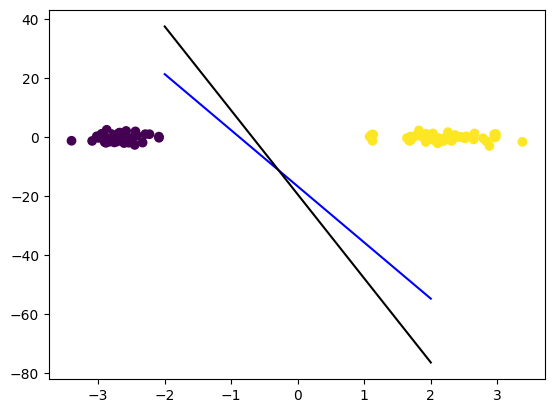

In [155]:
plt.scatter(x=df['f1'], y=df['f2'], c=df['target'])
plt.plot(x_input, y_input, c='blue')
plt.plot(x_input_clf, y_input_clf, c='black')

## Sigmoid Function Visualization

In [156]:
x_ = X[:, 1]
y_ = pd.DataFrame(x_)[0].apply(sigmoid)

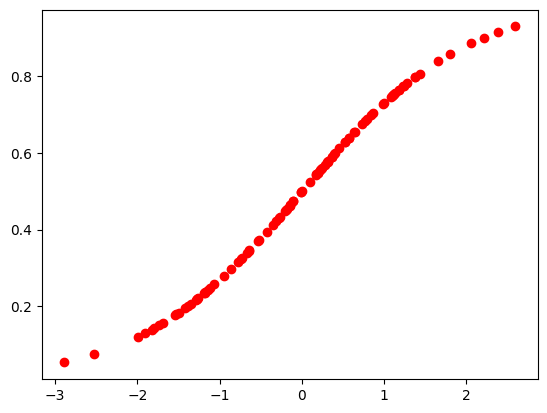

In [157]:
plt.scatter(x_, y_, c='red')